In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
img = glob.glob(r'D:\ML data\dataset\ZC_dataset_3DCP\trainset\inputs\*.bmp')

In [4]:
len(img)

7000

In [5]:
label = glob.glob(r'D:\ML data\dataset\ZC_dataset_3DCP\trainset\outputs\*.bmp')

In [6]:
train_count = len(label)
train_count

7000

In [7]:
label[:3]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case10.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case100.bmp']

In [8]:
img[510:515]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1458.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1459.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case146.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1460.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1461.bmp']

In [9]:
label[510:515]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1458.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1459.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case146.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1460.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1461.bmp']

In [10]:
index = np.random.permutation(len(img))

In [11]:
img = np.array(img)[index]
label = np.array(label)[index]

In [12]:
index

array([ 153,  450,  192, ..., 1107, 6623,  539])

In [13]:
img[510:515]

array(['D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1670.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case3085.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case6401.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case573.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\inputs\\case1504.bmp'],
      dtype='<U63')

In [14]:
label[510:515]

array(['D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1670.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case3085.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case6401.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case573.bmp',
       'D:\\ML data\\dataset\\ZC_dataset_3DCP\\trainset\\outputs\\case1504.bmp'],
      dtype='<U64')

In [15]:
img_val = glob.glob(r'D:\ML data\dataset\ZC_dataset_3DCP\testset\inputs\*.bmp')
label_val = glob.glob(r'D:\ML data\dataset\ZC_dataset_3DCP\testset\outputs\*.bmp')

In [16]:
val_count = len(img_val)
len(img_val),len(label_val)

(3000, 3000)

In [17]:
img_val[10:15]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\inputs\\case7010.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\inputs\\case7011.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\inputs\\case7012.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\inputs\\case7013.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\inputs\\case7014.bmp']

In [18]:
label_val[10:15]

['D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\outputs\\case7010.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\outputs\\case7011.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\outputs\\case7012.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\outputs\\case7013.bmp',
 'D:\\ML data\\dataset\\ZC_dataset_3DCP\\testset\\outputs\\case7014.bmp']

In [19]:
dataset_train = tf.data.Dataset.from_tensor_slices((img, label))

In [20]:
dataset_train

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.string)>

In [21]:
dataset_val = tf.data.Dataset.from_tensor_slices((img_val, label_val))

In [22]:
def read_bmp(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_bmp(img, channels=1)
    return img

In [23]:
def read_bmp_label(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_bmp(img, channels=1)
    return img

In [24]:
img_1 = read_bmp(img[0])
label_1 = read_bmp_label(label[0])

In [25]:
img_1.shape

TensorShape([64, 40, 1])

In [26]:
label_1.shape

TensorShape([64, 40, 1])

In [27]:
def normal(img, mask):
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32)/255
    return img, mask

In [28]:
def load_image_train(img_path, mask_path):
    img = read_bmp(img_path)
    mask = read_bmp_label(mask_path)
    
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32) #change
    
    img = tf.image.resize(img, (64,64))
    mask = tf.image.resize(mask, (64,64))
    
    img, mask=normal(img, mask)
        
    return img, mask

In [29]:
def load_image_val(img_path, mask_path):
    img = read_bmp(img_path)
    mask = read_bmp_label(mask_path)
    
    img = tf.cast(img, tf.float32)
    mask = tf.cast(mask, tf.int32) #change
    
    img = tf.image.resize(img, (64,64))
    mask = tf.image.resize(mask, (64,64))
    
    img, mask=normal(img, mask)
    
    return img, mask

In [30]:
BATCH_SIZE = 4
BUFFER_SIZE = 300
STEP_PER_EPOCH = train_count//BATCH_SIZE
# VAL_STEP = val_count//BATCH_SIZE

In [31]:
auto = tf.data.experimental.AUTOTUNE

In [32]:
dataset_train = dataset_train.map(load_image_train,num_parallel_calls=auto)
dataset_val = dataset_val.map(load_image_val, num_parallel_calls=auto)

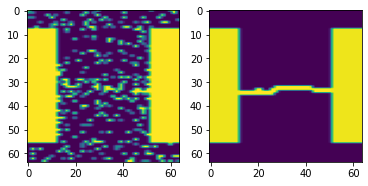

In [33]:
for i, m in dataset_train.take(1):
    plt.subplot(1,2,1)
    plt.imshow(i.numpy())
    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(m.numpy()))

In [34]:
dataset_train = dataset_train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [35]:
dataset_val = dataset_val.batch(BATCH_SIZE)

定义UNET模型

In [36]:
class Downsample(tf.keras.layers.Layer):
    def __init__(self,units):
        super(Downsample, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.conv2 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.pool = tf.keras.layers.MaxPooling2D()
    def call(self, x, is_pool=True):
        if is_pool:
            x = self.pool(x)
        x = self.conv1(x)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = tf.nn.relu(x)
        return x

In [37]:
Downsample.trainable_variables

In [38]:
class Upsample(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Upsample, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.conv2 = tf.keras.layers.Conv2D(units, kernel_size=3,
                                            padding='same')
        self.deconv = tf.keras.layers.Conv2DTranspose(units//2,
                                                      kernel_size=2,
                                                      strides = 2,
                                                      padding='same')
    def call(self, x):
        x = self.conv1(x)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = tf.nn.relu(x)
        x = self.deconv(x)
        x = tf.nn.relu(x)
        return x  

In [39]:
class Unet_model(tf.keras.Model):
    def __init__(self):
        super(Unet_model, self).__init__()
        self.down1 = Downsample(64) #初始化不用处理  is_pool
        self.down2 = Downsample(128)
        self.down3 = Downsample(256)
        self.down4 = Downsample(512)
        self.down5 = Downsample(1024)
        
        self.up = tf.keras.layers.Conv2DTranspose(512,
                                                  kernel_size = 2,
                                                  strides = 2,
                                                  padding = 'same')
        
        self.up1 = Upsample(512)
        self.up2 = Upsample(256)
        self.up3 = Upsample(128)
        
        self.conv_last = Downsample(64)
        
        self.last = tf.keras.layers.Conv2D(2,
                                           kernel_size=1,
                                           padding='same')
    def call(self, x):
        x1 = self.down1(x, is_pool=False)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x5 = self.down5(x4)
        
        x5 = self.up(x5)
        
        x5 = tf.concat([x4,x5], axis=-1)
        x5 = self.up1(x5)
        
        x5 = tf.concat([x3,x5], axis=-1)
        x5 = self.up2(x5)
        
        x5 = tf.concat([x2,x5], axis=-1)
        x5 = self.up3(x5)
        
        x5 = tf.concat([x1,x5], axis=-1)
        
        x5 = self.conv_last(x5, is_pool=False)
        
        x5 = self.last(x5)
        return x5

In [40]:
model = Unet_model()

In [41]:
model

In [42]:
opt = tf.keras.optimizers.Adam(0.0001)

In [43]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #labels is 0.1.2...

In [44]:
class MeanIOU(tf.keras.metrics.MeanIoU):
    def __call__(self, y_true, y_pred):
        y_pred = tf.argmax(y_pred, axis=-1)
        return super().__call__(y_true,y_pred)

In [45]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
train_iou = MeanIOU(2, name='train_iou')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')
test_iou = MeanIOU(2, name='test_iou')

In [46]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_function(labels, predictions)
        
    gradients = tape.gradient(loss, model.trainable_variables)
    opt.apply_gradients(zip(gradients,model.trainable_variables))
    
    train_loss(loss)
    train_acc(labels, predictions)
    train_iou(labels,predictions)

In [47]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_function(labels, predictions)
    
    test_loss(t_loss)
    test_acc(labels, predictions)
    test_iou(labels, predictions)

In [48]:
EPOCHS = 50

for epoch in range(EPOCHS):
    #在下一个epoch开始时，重置评估指标
    train_loss.reset_states()
    train_acc.reset_states()
    train_iou.reset_states()
    test_loss.reset_states()
    test_acc.reset_states()
    test_iou.reset_states()
    
    for images, labels in dataset_train:
        train_step(images, labels)
        
    for test_images, test_labels in dataset_val:
        test_step(test_images, test_labels)
        
    template = 'Epoch {:.1f}, \
                Loss: {:.3f}, Accuracy: {:.3f}, IOU: {:.3f}, \
                Test Loss: {:.3f},  Test Accuacy: {:.3f}, Test IOU: {:.3f}'
    
    print(template.format(epoch+1,
                          train_loss.result(),
                          train_acc.result()*100,
                          train_iou.result(),
                          test_loss.result(),
                          test_acc.result()*100,
                          test_iou.result()
                         ))
        
        
#     for test_images, test_labels in dataset_val:
#         test_step(test_images, test_labels)
        
#     template = 'Epoch {:.1f}, \
#                 Loss: {:.3f}, Accuracy: {:.3f}'
    
#     print(template.format(epoch+1,
#                           train_loss.result(),
#                           train_acc.result()*100,
#                          ))




Epoch 1.0,                 Loss: 0.070, Accuracy: 64.912, IOU: 0.492,                 Test Loss: 0.065,  Test Accuacy: 64.936, Test IOU: 0.492
Epoch 2.0,                 Loss: 0.063, Accuracy: 64.936, IOU: 0.493,                 Test Loss: 0.064,  Test Accuacy: 64.937, Test IOU: 0.492
Epoch 3.0,                 Loss: 0.061, Accuracy: 64.937, IOU: 0.495,                 Test Loss: 0.062,  Test Accuacy: 64.939, Test IOU: 0.496
Epoch 4.0,                 Loss: 0.059, Accuracy: 64.940, IOU: 0.497,                 Test Loss: 0.060,  Test Accuacy: 64.938, Test IOU: 0.493
Epoch 5.0,                 Loss: 0.058, Accuracy: 64.947, IOU: 0.502,                 Test Loss: 0.060,  Test Accuacy: 64.941, Test IOU: 0.496
Epoch 6.0,                 Loss: 0.055, Accuracy: 64.959, IOU: 0.512,                 Test Loss: 0.063,  Test Accuacy: 64.905, Test IOU: 0.516
Epoch 7.0,                 Loss: 0.051, Accuracy: 64.989, IOU: 0.529,                 Test Loss: 0.067,  Test Accuacy: 64.895, Test IOU: 0.520

In [51]:
image1= next(iter(images))

In [52]:
image1

<tf.Tensor: shape=(64, 64, 1), dtype=float32, numpy=
array([[[  0.    ],
        [  0.    ],
        [  0.    ],
        ...,
        [  0.    ],
        [  0.    ],
        [  0.    ]],

       [[  0.    ],
        [  0.    ],
        [  8.    ],
        ...,
        [  0.    ],
        [  0.    ],
        [  0.    ]],

       [[  0.    ],
        [ 56.    ],
        [120.    ],
        ...,
        [  0.    ],
        [  0.    ],
        [  0.    ]],

       ...,

       [[  0.    ],
        [  0.    ],
        [  0.    ],
        ...,
        [  8.    ],
        [143.4375],
        [255.    ]],

       [[  0.    ],
        [ 56.    ],
        [120.    ],
        ...,
        [  0.    ],
        [  0.    ],
        [  0.    ]],

       [[  0.    ],
        [111.5625],
        [239.0625],
        ...,
        [  0.    ],
        [  0.    ],
        [  0.    ]]], dtype=float32)>

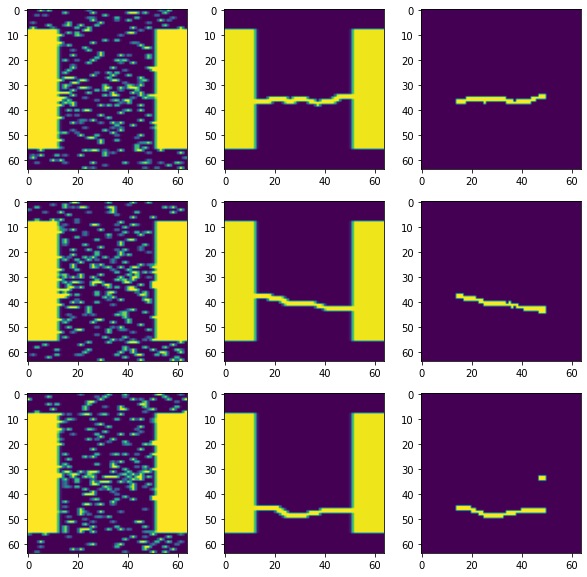

In [73]:
num = 3
for image, mask in dataset_train.take(1):
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[..., tf.newaxis] #...means that all the dimensions are taken and tf.newaxis means that a new dim is added
    
    plt.figure(figsize=(10,10))
    for i in range(num):
        plt.subplot(num, 3, i*num+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image[i]))
        plt.subplot(num, 3, i*num+2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
        plt.subplot(num, 3, i*num+3)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))

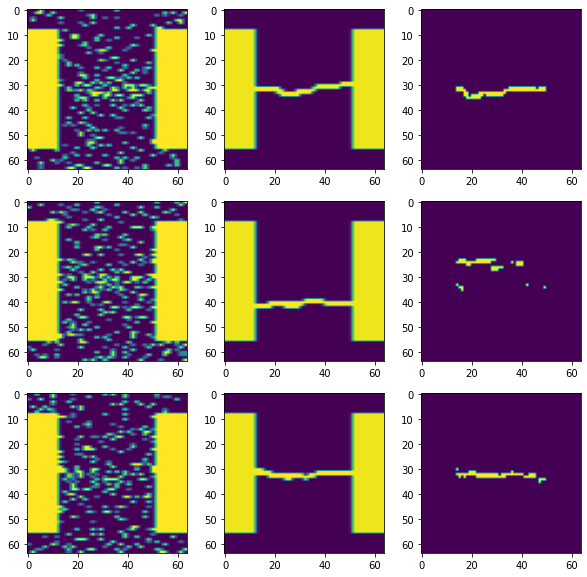

In [72]:
num = 3
for image, mask in dataset_val.take(1):
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask,axis=-1)
    pred_mask = pred_mask[..., tf.newaxis] #...means that all the dimensions are taken and tf.newaxis means that a new dim is added
    
    plt.figure(figsize=(10,10))
    for i in range(num):
        plt.subplot(num, 3, i*num+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image[i]))
        plt.subplot(num, 3, i*num+2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
        plt.subplot(num, 3, i*num+3)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))